<h1 align="center">XOR - Not an Easy Problem</h1>

<hr>
<h3>Training sample</h3>
<p>2-dimensional <strong style="color:red">hard</strong> samples generated by numpy</p>

<hr>
<h3>Ploting scatter data of 2-classes</h3>
<p>由 numpy 工具模組產生兩組（兩個類別）隨機數據，normal 可以指定 mean（平均值）與 std（標準差）的<strong style="color:orange">常態分佈</strong>隨機亂數</p>
<p>形成所謂的 <strong style="color:red">XOR</strong> 難題</p>

In [1]:
# matplotlib 第一張圖常常不能顯示，所以先產生一張，當作啟動，讓後續真正需要的圖表能正常顯示
import matplotlib.pyplot as plt
plt.show()

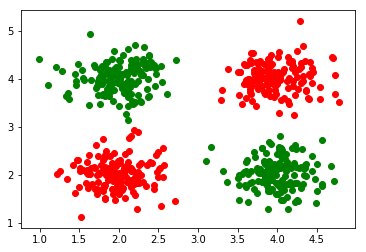

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N11 = 150
N12 = 150
N21 = 150
N22 = 150
N1 = N11 + N12
N2 = N21 + N22
N = N1 + N2

# Class 1
x11 = np.random.normal(2.0, 0.3, N11)
y11 = np.random.normal(2.0, 0.3, N11)
x12 = np.random.normal(4.0, 0.3, N12)
y12 = np.random.normal(4.0, 0.3, N12)
x1 = np.zeros(N1)
x1[0:N11] = x11[0:N11]
x1[N11:N11+N12] = x12[0:N12]
y1 = np.zeros(N1)
y1[0:N11] = y11[0:N11]
y1[N11:N11+N12] = y12[0:N12]
# Class 2
x21 = np.random.normal(2.0, 0.3, N11)
y21 = np.random.normal(4.0, 0.3, N11)
x22 = np.random.normal(4.0, 0.3, N12)
y22 = np.random.normal(2.0, 0.3, N12)
x2 = np.zeros(N2)
x2[0:N21] = x21[0:N21]
x2[N21:N21+N22] = x22[0:N22]
y2 = np.zeros(N2)
y2[0:N21] = y21[0:N21]
y2[N21:N21+N22] = y22[0:N22]

plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')

plt.show()

<hr>
<h3>Neuron Definition in PyTorch (One Neuron)</h3>

In [3]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 2 inputs -> 1 output
        self.fc = nn.Linear(2, 1)
    def forward(self, x):
        x = self.fc(x).sigmoid()
        return x

net = Net()

print(net)

Net(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


<hr>
<h3>All parameters to be determined (2 for weights and 1 for bias)</h3>

In [4]:
params = list(net.parameters())
print(params)

[Parameter containing:
tensor([[0.5195, 0.4955]], requires_grad=True), Parameter containing:
tensor([0.6472], requires_grad=True)]


<hr>
<h3>Training Phase</h3>

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

EPOCH = 10000

# preparing training samples

x = torch.randn(N, 2)
y = torch.randn(N, 1)
for i in range(N1):
    x[i,0] = x1[i]
    x[i,1] = y1[i]
    y[i] = 0
for i in range(N1, N1+N2):
    x[i,0] = x2[i-N1]
    x[i,1] = y2[i-N1]
    y[i] = 1

# shuffling

idx = [i for i in range(N)]
idx = np.random.permutation(idx)
x0 = x
y0 = y
for i in range(N):
    x[i] = x0[idx[i]]
    y[i] = y0[idx[i]]

# Loss function
criterion = nn.MSELoss()
# Optimizer
# optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer = optim.Adam(net.parameters(), lr=0.01)

# training
for epoch in range(EPOCH):
    # zero the gradient buffers
    optimizer.zero_grad()
    # feed foreward
    output = net(x)
    # evaluating loss
    loss = criterion(output, y)
    # display loss
    if (epoch % 100 == 0):
        print('epoch = %6d, loss = %12.8f' % (epoch, loss))
    # feed backward
    loss.backward()
    # update parameters
    optimizer.step()


epoch =      0, loss =   0.28673348
epoch =    100, loss =   0.21334185
epoch =    200, loss =   0.20500578
epoch =    300, loss =   0.19585370
epoch =    400, loss =   0.18658289
epoch =    500, loss =   0.17739832
epoch =    600, loss =   0.16846134
epoch =    700, loss =   0.15999685
epoch =    800, loss =   0.15222049
epoch =    900, loss =   0.14526053
epoch =   1000, loss =   0.13914311
epoch =   1100, loss =   0.13382059
epoch =   1200, loss =   0.12920792
epoch =   1300, loss =   0.12520912
epoch =   1400, loss =   0.12173210
epoch =   1500, loss =   0.11869510
epoch =   1600, loss =   0.11602827
epoch =   1700, loss =   0.11367332
epoch =   1800, loss =   0.11158202
epoch =   1900, loss =   0.10971471
epoch =   2000, loss =   0.10803864
epoch =   2100, loss =   0.10652680
epoch =   2200, loss =   0.10515678
epoch =   2300, loss =   0.10390995
epoch =   2400, loss =   0.10277066
epoch =   2500, loss =   0.10172582
epoch =   2600, loss =   0.10076428
epoch =   2700, loss =   0.0

<hr>
<h3>Testing Phase - Something Fails!</h3>

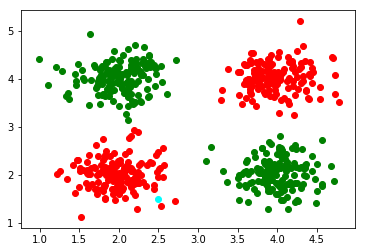

v =  1.0
1: green


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 測試樣本
x3 = [2.5] # 測試點 X 座標
y3 = [1.5] # 測試點 Y 座標

# 繪製樣本圖
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='cyan')
plt.show()

# 準備測試樣本，轉變格式成為 Tensor
x = torch.Tensor([x3[0],y3[0]])

# 測試（feed foreward）
output = net(x)

# 由輸出 Tensor 取出結果
v = output.tolist()[0]

# 顯示結果
print('v = ', v)
if (v <= 0.5):
    print('0: red')
else:
    print('1: green')


<hr>
<h3>Testing all training samples - Almost All Fail!</h3>

Recognition Rate = 446 / 600


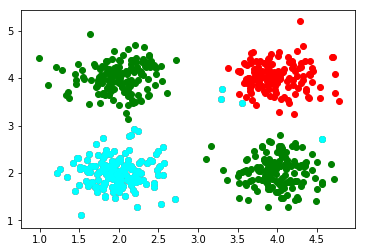

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = torch.randn(N, 2)
y = torch.randn(N, 1)

# 準備整批樣本（Class 1）
for i in range(N1):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x1[i],y1[i]])  
# 整批測試（feed foreward）
output = net(x)
# 由輸出 Tensor 取出結果
lst1 = output.tolist()

# 準備整批樣本（Class 2）
for i in range(N2):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x2[i],y2[i]])  
# 整批測試（feed foreward）
output = net(x)
# 由輸出 Tensor 取出結果
lst2 = output.tolist()

# 顯示結果

x3 = []
y3 = []

correct = 0
for i in range(N1):
    v = lst1[i][0]
    if (v <= 0.5):
        correct = correct + 1
    else:
        x3.append(x1[i])
        y3.append(y1[i])
for i in range(N2):
    v = lst2[i][0]
    if (v > 0.5):
        correct = correct + 1
    else:
        x3.append(x2[i])
        y3.append(y2[i])
        
print('Recognition Rate = %d / %d' % (correct, N1+N2))

# 繪製樣本圖
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='cyan')
plt.show()


<hr>
<h3>Testing all other samples - Fail! Fail! Fail!</h3>

Recognition Rate = 443 / 600


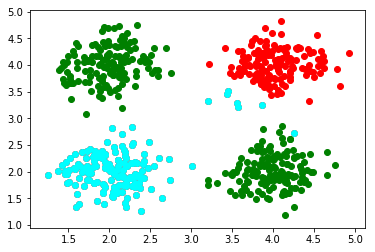

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 利用相同的隨機分布，重新產生一組整批測試用的樣本

N1 = 300
N2 = 300
N = N1 + N2

N11 = 150
N12 = 150
N21 = 150
N22 = 150
N1 = N11 + N12
N2 = N21 + N22
N = N1 + N2

# Class 1
x11 = np.random.normal(2.0, 0.3, N11)
y11 = np.random.normal(2.0, 0.3, N11)
x12 = np.random.normal(4.0, 0.3, N12)
y12 = np.random.normal(4.0, 0.3, N12)
x1 = np.zeros(N1)
x1[0:N11] = x11[0:N11]
x1[N11:N11+N12] = x12[0:N12]
y1 = np.zeros(N1)
y1[0:N11] = y11[0:N11]
y1[N11:N11+N12] = y12[0:N12]
# Class 2
x21 = np.random.normal(2.0, 0.3, N11)
y21 = np.random.normal(4.0, 0.3, N11)
x22 = np.random.normal(4.0, 0.3, N12)
y22 = np.random.normal(2.0, 0.3, N12)
x2 = np.zeros(N2)
x2[0:N21] = x21[0:N21]
x2[N21:N21+N22] = x22[0:N22]
y2 = np.zeros(N2)
y2[0:N21] = y21[0:N21]
y2[N21:N21+N22] = y22[0:N22]

x = torch.randn(N, 2)
y = torch.randn(N, 1)

# 準備整批樣本（Class 1）
for i in range(N1):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x1[i],y1[i]])  
# 整批測試（feed foreward）
output = net(x)
# 由輸出 Tensor 取出結果
lst1 = output.tolist()

# 準備整批樣本（Class 2）
for i in range(N2):
    # 準備測試樣本，轉變格式成為 Tensor
    x[i] = torch.Tensor([x2[i],y2[i]])  
# 整批測試（feed foreward）
output = net(x)
# 由輸出 Tensor 取出結果
lst2 = output.tolist()

# 顯示結果

x3 = []
y3 = []

correct = 0
for i in range(N1):
    v = lst1[i][0]
    if (v <= 0.5):
        correct = correct + 1
    else:
        x3.append(x1[i])
        y3.append(y1[i])
for i in range(N2):
    v = lst2[i][0]
    if (v > 0.5):
        correct = correct + 1
    else:
        x3.append(x2[i])
        y3.append(y2[i])
        
print('Recognition Rate = %d / %d' % (correct, N1+N2))

# 繪製樣本圖
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='cyan')
plt.show()
